In [41]:
#Spam email classifier
''' WEBWIZ AIML INDUCTION TASK
                 LEVEL1
    The Analyst(Data Processing)
NAME- Tamanna Kumari
Roll no. - 125EI0059
Topic- Spam Email Classifier'''

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [42]:
# System Initialization Check
# Verifying set up
print("everything is working")

everything is working


In [43]:

# Importing pandas for efficient data handling
import pandas as pd

# Loading the spam dataset from CSV file with 'latin-1' encoding to handle special characters
df = pd.read_csv("data/spam.csv", encoding="latin-1")

# Displaying the first 5 rows to get a glimpse of our data structure
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='label', ylabel='count'>

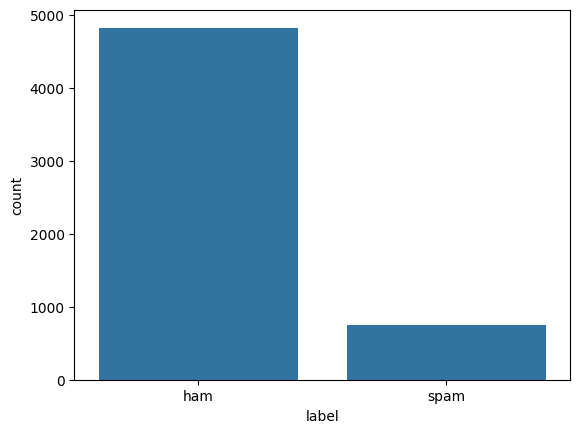

In [44]:

# Getting a comprehensive overview of the dataset: shape, columns, data types
df.info()

# Statistical summary of numerical columns ( mostly text here)
df.describe()

# Checking the distribution of labels (ham vs spam) for class balance
df['label'].value_counts()

# Importing seaborn for visualization
import seaborn as sns

# Visualizing the label distribution with a count plot
sns.countplot(x=df['label'])

In [45]:

# Selecting only the relevant columns: 'label' (target) and 'message' (features)
df = df[['label', 'message']]

# Removing duplicate rows to ensure data quality and avoid model bias
df.drop_duplicates(inplace=True)

# Dropping any rows with missing values
df.dropna(inplace=True)

In [46]:
# Text Cleaning Function
# Importing regex for pattern matching and text manipulation
import re

# Defining a function to clean text data: lowercase, remove non-alphanumeric characters
def clean_text(text):
    # Convert to lowercase for uniformity
    text = text.lower()
    # Remove punctuation and special characters, keeping only letters, numbers, and spaces
    text = re.sub(r'[^a-z0-9\s]', " ", text)
    return text

# Applying the cleaning function to the 'message' column and storing in a new 'clean_text' column
df['clean_text'] = df['message'].apply(clean_text)

In [47]:
#verifying setup
print("hello")

hello


In [48]:
# Feature Engineering (LEVEL 2: The Builder)
# Initializing TF-IDF Vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()

# Transforming the cleaned text into a TF-IDF matrix (features)
X = vectorizer.fit_transform(df['clean_text'])

# Extracting the target labels
Y = df['label']

In [49]:
# Data Splitting
# Importing train_test_split for dividing data into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the data: 80% for training, 20% for testing, with random_state for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:

# Importing Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Initializing the model
model = MultinomialNB()

# Training the model on the training data
model.fit(X_train, Y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [51]:
#  Model Evaluation (LEVEL 3: The Evaluator)
# Importing classification_report for detailed performance metrics
from sklearn.metrics import classification_report

# Making predictions on the test set
Y_pred = model.predict(X_test)

# Printing the classification report: precision, recall, F1-score, and accuracy
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       894
        spam       1.00      0.70      0.82       140

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [52]:
#custom prediction function
def predict_spam(text):
    cleaned= clean_text(text)
    vectorized= vectorizer.transform([cleaned])
    prediction=model.predict(vectorized)[0]
    return prediction
#testing 
print(predict_spam("congo, u won 5lakhs!"))

ham
